# Generalized Linear Modeling (using reduced data sets)

- - -

<p><a name="home"></a></p>
## SECTIONS:
1. <a href="#overview">Initializing</a><br>
2. <a href="#ridge">Penalized Regression: RIDGE</a><br>
3. <a href="#lasso">Penalized Regrssion: LASSO</a><br>
4. <a href="#elastic">ELASTIC NET</a><br>

- - -

<p><a name="overview"></a></p>
## 1. Initializing:
<a href="#home">BACK TO THE TOP</a>

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

### Loading Data:

In [2]:
X        = pd.read_csv('./data/xtrain_red.csv')
y        = pd.read_csv('./data/ytrain_red.csv')
XPredict = pd.read_csv('./data/xtest_red.csv')
testID   = pd.read_csv('./data/testID.csv')

**Cleaning imported .csv(s):**

In [3]:
#X        = X.drop(['Unnamed: 0'], axis=1)
XPredict #= XPredict.drop(['Unnamed: 0'], axis=1)

,Unnamed: 0,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,YearBuilt,HeatingQC,KitchenAbvGr,KitchenQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1458,80.0,11622,3,2,6,1961,3,1,3,...,0,0,0,0,1,0,0,0,1,0
1,1459,81.0,14267,2,2,6,1958,3,1,4,...,0,0,0,0,1,0,0,0,1,0
2,1460,74.0,13830,2,2,5,1997,4,1,3,...,0,0,0,0,1,0,0,0,1,0
3,1461,78.0,9978,2,2,6,1998,5,1,4,...,0,0,0,0,1,0,0,0,1,0
4,1462,43.0,5005,2,2,5,1992,5,1,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2912,21.0,1936,3,2,7,1970,4,1,3,...,0,0,0,0,1,0,0,0,1,0
1455,2913,21.0,1894,3,2,5,1970,3,1,3,...,0,0,0,0,1,0,0,0,0,0
1456,2914,160.0,20000,3,2,7,1960,5,1,3,...,0,0,0,0,1,0,0,0,0,0
1457,2915,62.0,10441,3,2,5,1992,3,1,3,...,0,0,0,0,1,0,0,0,1,0


In [4]:
y.columns      = ['x', 'Id']
y              = np.array(y.Id)

testID.columns = ['x', 'Id']
testID         = testID.drop(['x'], axis=1)

In [5]:
testID

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [6]:
X

,Unnamed: 0,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,YearBuilt,HeatingQC,KitchenAbvGr,KitchenQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,65.0,8450,3,2,5,2003,5,1,4,...,0,0,0,0,1,0,0,0,1,0
1,1,80.0,9600,3,2,8,1976,5,1,3,...,0,0,0,0,1,0,0,0,1,0
2,2,68.0,11250,2,2,5,2001,5,1,4,...,0,0,0,0,1,0,0,0,1,0
3,3,60.0,9550,2,2,5,1915,4,1,4,...,0,0,0,0,1,0,0,0,0,0
4,4,84.0,14260,2,2,5,2000,5,1,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1453,62.0,7917,3,2,5,1999,5,1,3,...,0,0,0,0,1,0,0,0,1,0
1454,1454,85.0,13175,3,2,6,1978,3,1,3,...,0,0,0,0,1,0,0,0,1,0
1455,1455,66.0,9042,3,2,9,1941,5,1,4,...,0,0,0,0,1,0,0,0,1,0
1456,1456,68.0,9717,3,2,6,1950,4,1,4,...,0,0,0,0,1,0,0,0,1,0


In [7]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

### Generating Training and Validation subsets (from training set):

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,Unnamed: 0,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,YearBuilt,HeatingQC,KitchenAbvGr,KitchenQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,254,70.0,8400,3,2,6,1957,3,1,3,...,0,0,0,0,1,0,0,0,1,0
1065,1065,59.0,7837,2,2,7,1993,4,1,3,...,0,0,0,0,1,0,0,0,1,0
864,864,73.0,8750,2,2,6,1970,3,1,3,...,0,0,0,0,1,0,0,0,1,0
798,798,60.0,7200,3,2,7,1937,5,1,4,...,0,0,0,0,1,0,0,0,1,0
380,380,50.0,5000,3,2,6,1924,3,1,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,60.0,6882,3,2,7,1914,3,1,4,...,0,0,0,0,1,0,0,0,1,0
1130,1130,63.0,10712,3,2,5,1991,3,1,3,...,0,0,0,1,0,0,0,0,0,0
1294,1294,70.0,8400,3,2,5,1968,4,1,3,...,0,0,0,0,1,0,0,0,1,0
860,860,75.0,11625,3,2,4,1965,5,1,3,...,0,0,0,0,1,0,0,0,1,0


In [10]:
y_log = np.log(y)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Initializing Model Objects:

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge   = Ridge()
lasso   = Lasso()
elastic = ElasticNet()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV

- - -

<p><a name="ridge"></a></p>
## 2. Penalized Regression: RIDGE
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha):**

In [13]:
ridge_alpharange = np.linspace(0.001,40, 1000)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

In [14]:
ridge_scores_train = []
ridge_scores_test  = []
ridge_coefs        = []

**Iterating through previously selected grid of lambda values:**

In [15]:
for alpha in ridge_alpharange:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train_log)
    ridge_scores_train.append(ridge.score(X_train, y_train_log))
    ridge_scores_test.append(ridge.score(X_test, y_test_log))
    ridge_coefs.append(ridge.coef_)

**Creating arrays of score and coefficient lists:**

In [16]:
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test  = np.array(ridge_scores_test)
ridge_coefs        = np.array(ridge_coefs)

**Visually comparing $R^2$ values of models per Lambda values:**

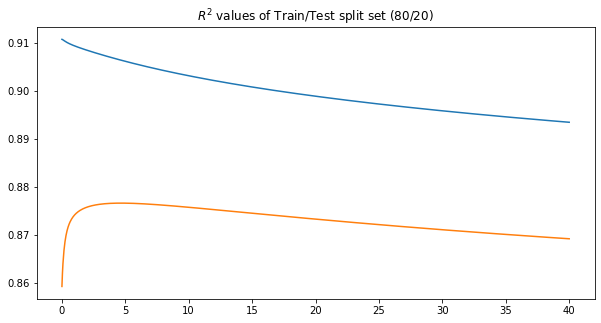

In [17]:
plt.figure(figsize=(10,5))
plt.plot(ridge_alpharange, ridge_scores_train)
plt.plot(ridge_alpharange, ridge_scores_test)
plt.title('$R^2$ values of Train/Test split set (80/20)')
plt.show()

**Visualizing Coefficients being penalized by Lambda Values:**

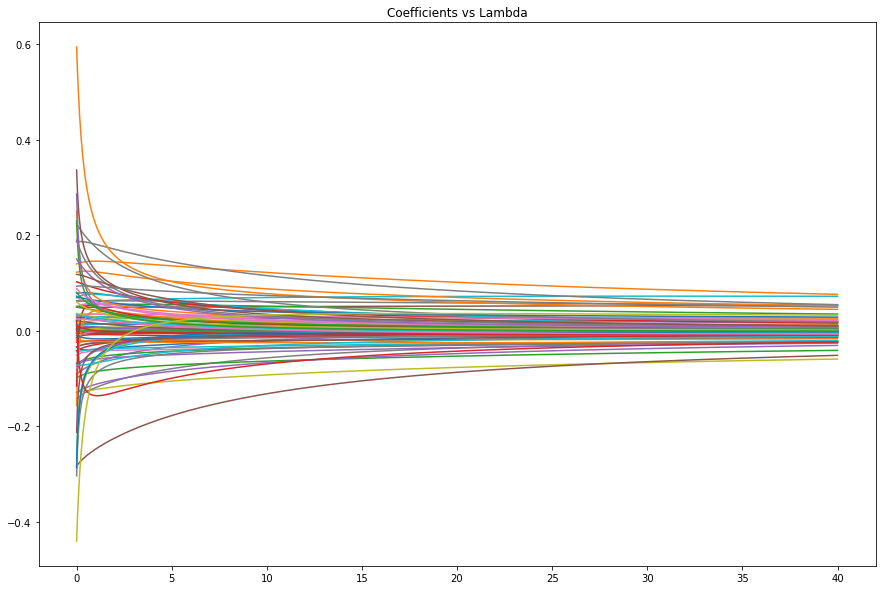

In [18]:
plt.figure(figsize=(15,10))
plt.plot(ridge_alpharange, ridge_coefs)
plt.title('Coefficients vs Lambda')
plt.show()

**Using complete training set (no split) to train model using GridSearchCV function:**

In [19]:
gsridge = GridSearchCV(ridge, {"alpha":ridge_alpharange}, scoring='r2')
gsridge.fit(X, y_log)

GridSearchCV(estimator=Ridge(alpha=40.0),
             param_grid={'alpha': array([1.00000000e-03, 4.10390390e-02, 8.10780781e-02, 1.21117117e-01,
       1.61156156e-01, 2.01195195e-01, 2.41234234e-01, 2.81273273e-01,
       3.21312312e-01, 3.61351351e-01, 4.01390390e-01, 4.41429429e-01,
       4.81468468e-01, 5.21507508e-01, 5.61546547e-01, 6.01585586e-01,
       6.41624625e-01, 6.81663664e-01, 7.21702703e-...
       3.90791021e+01, 3.91191411e+01, 3.91591802e+01, 3.91992192e+01,
       3.92392583e+01, 3.92792973e+01, 3.93193363e+01, 3.93593754e+01,
       3.93994144e+01, 3.94394535e+01, 3.94794925e+01, 3.95195315e+01,
       3.95595706e+01, 3.95996096e+01, 3.96396486e+01, 3.96796877e+01,
       3.97197267e+01, 3.97597658e+01, 3.97998048e+01, 3.98398438e+01,
       3.98798829e+01, 3.99199219e+01, 3.99599610e+01, 4.00000000e+01])},
             scoring='r2')

In [20]:
gsridge.best_params_

{'alpha': 5.686543543543544}

In [21]:
gsridge.best_score_

0.8855300817264696

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [22]:
ridge.set_params(alpha = gsridge.best_params_)
print(ridge)

Ridge(alpha={'alpha': 5.686543543543544})


In [23]:
XPredict

,Unnamed: 0,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,YearBuilt,HeatingQC,KitchenAbvGr,KitchenQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1458,80.0,11622,3,2,6,1961,3,1,3,...,0,0,0,0,1,0,0,0,1,0
1,1459,81.0,14267,2,2,6,1958,3,1,4,...,0,0,0,0,1,0,0,0,1,0
2,1460,74.0,13830,2,2,5,1997,4,1,3,...,0,0,0,0,1,0,0,0,1,0
3,1461,78.0,9978,2,2,6,1998,5,1,4,...,0,0,0,0,1,0,0,0,1,0
4,1462,43.0,5005,2,2,5,1992,5,1,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2912,21.0,1936,3,2,7,1970,4,1,3,...,0,0,0,0,1,0,0,0,1,0
1455,2913,21.0,1894,3,2,5,1970,3,1,3,...,0,0,0,0,1,0,0,0,0,0
1456,2914,160.0,20000,3,2,7,1960,5,1,3,...,0,0,0,0,1,0,0,0,0,0
1457,2915,62.0,10441,3,2,5,1992,3,1,3,...,0,0,0,0,1,0,0,0,1,0


**Printing .csv:**

In [24]:
ridge.predict(XPredict)

array([11.65781852, 11.91115678, 12.0555456 , ..., 11.99815821,
       11.75741718, 12.15377601])

In [25]:
np.exp(ridge.predict(XPredict))
gs_ridge_min_predict         = pd.DataFrame(np.exp(ridge.predict(XPredict)), index = testID['Id'])
gs_ridge_min_predict.columns = ['SalePrice']
gs_ridge_min_predict.to_csv('./Prediction/gs_ridge_reduced_predict.csv')



- - -

<p><a name="lasso"></a></p>
## 3. Penalized Regrssion: LASSO
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha):**

In [26]:
lasso_alpharange = np.linspace(0.0001,0.1,1000)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

In [27]:
lasso_scores_train = []
lasso_scores_test  = []
lasso_coefs        = []

**Iterating through previously selected grid of lambda values:**

In [28]:
for alpha in lasso_alpharange:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train_log)
    lasso_scores_train.append(lasso.score(X_train, y_train_log))
    lasso_scores_test.append(lasso.score(X_test, y_test_log))
    lasso_coefs.append(lasso.coef_)

**Creating arrays of score and coefficient lists:**

In [29]:
lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test  = np.array(lasso_scores_test)
lasso_coefs        = np.array(lasso_coefs)

**Visually comparing $R^2$ values of models per Lambda values:**

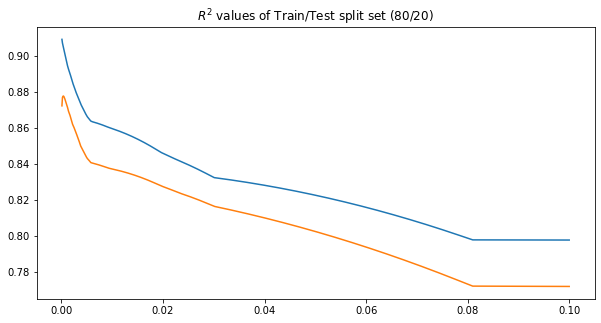

In [30]:
plt.figure(figsize=(10,5))
plt.plot(lasso_alpharange, lasso_scores_train)
plt.plot(lasso_alpharange, lasso_scores_test)
plt.title('$R^2$ values of Train/Test split set (80/20)')
plt.show()

**Visualizing Coefficients being penalized by Lambda Values:**

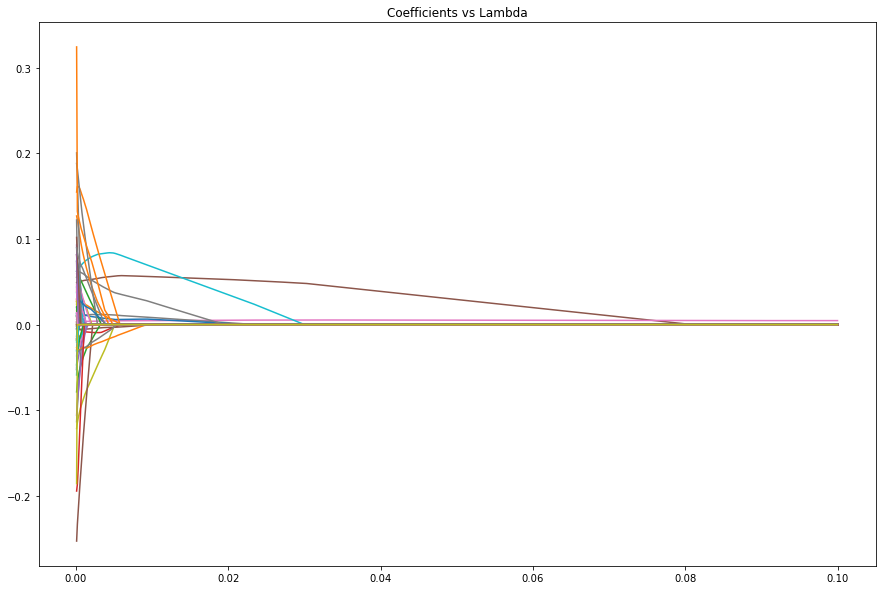

In [31]:
plt.figure(figsize=(15,10))
plt.plot(lasso_alpharange, lasso_coefs)
plt.title('Coefficients vs Lambda')
plt.show()

**Using complete training set (no split) to train model using GridSearchCV function:**

In [32]:
gslasso = GridSearchCV(lasso, {"alpha":lasso_alpharange}, scoring='r2')
gslasso.fit(X, y_log)

GridSearchCV(estimator=Lasso(alpha=0.1),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041,...
       0.0945, 0.0946, 0.0947, 0.0948, 0.0949, 0.095 , 0.0951, 0.0952,
       0.0953, 0.0954, 0.0955, 0.0956, 0.0957, 0.0958, 0.0959, 0.096 ,
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ])},
             scoring='r2')

In [33]:
gslasso.best_params_

{'alpha': 0.0004}

In [34]:
gslasso.best_score_

0.8864649372616876

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [35]:
lasso.set_params(alpha = gslasso.best_params_)
print(lasso)

Lasso(alpha={'alpha': 0.0004})


**Printing .csv :**

In [36]:
gs_lasso_min_predict         = pd.DataFrame(np.exp(lasso.predict(XPredict)), index = testID['Id'])
gs_lasso_min_predict.columns = ['SalePrice']
gs_lasso_min_predict.to_csv('./Prediction/gs_lasso_reduced_predict.csv')

- - -

<p><a name="elastic"></a></p>
## 4. ELASTIC NET
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha) & tuning hyperparameter, rho(l1_ratio):**

In [37]:
elastic_alpharange = np.logspace(-4,2,1000)
rhorange         = np.linspace(0.5, 0.99, 10)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

**Using complete training set (no split) to train model using GridSearchCV function:**

In [38]:
elasticCV = ElasticNetCV(alphas = elastic_alpharange, l1_ratio = rhorange)
elasticCV.fit(X, y_log)

ElasticNetCV(alphas=array([1.00000000e-04, 1.01392541e-04, 1.02804473e-04, 1.04236067e-04,
       1.05687597e-04, 1.07159340e-04, 1.08651577e-04, 1.10164595e-04,
       1.11698682e-04, 1.13254132e-04, 1.14831241e-04, 1.16430313e-04,
       1.18051653e-04, 1.19695570e-04, 1.21362380e-04, 1.23052400e-04,
       1.24765955e-04, 1.26503372e-04, 1.28264983e-04, 1.30051125e-04,
       1.31862140e-04, 1.336983...
       8.12661920e+01, 8.23978568e+01, 8.35452806e+01, 8.47086827e+01,
       8.58882856e+01, 8.70843150e+01, 8.82969996e+01, 8.95265713e+01,
       9.07732653e+01, 9.20373200e+01, 9.33189772e+01, 9.46184819e+01,
       9.59360829e+01, 9.72720319e+01, 9.86265846e+01, 1.00000000e+02]),
             l1_ratio=array([0.5       , 0.55444444, 0.60888889, 0.66333333, 0.71777778,
       0.77222222, 0.82666667, 0.88111111, 0.93555556, 0.99      ]))

In [39]:
elasticCV.alpha_

0.0003720236681413066

In [40]:
elasticCV.l1_ratio_

0.99

In [ ]:
# list(elasticCV.alphas_).index(0.0006120498372476703)
# np.mean(elasticCV.mse_path_[-1,:,:], axis=1).shape

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [41]:
elasticCV.set_params(alphas = elasticCV.alpha_, l1_ratio = elasticCV.l1_ratio_)
print(elasticCV)

ElasticNetCV(alphas=0.0003720236681413066, l1_ratio=0.99)


**Printing .csv:**

In [42]:
elasticCV_min_predict         = pd.DataFrame(np.exp(elasticCV.predict(XPredict)), index = testID['Id'])
elasticCV_min_predict.columns = ['SalePrice']
elasticCV_min_predict.to_csv('./Prediction/elasticCV_reduced_predict.csv')

- - -